## What are top 10 comments with the least agreement for toxicity and aggression? Which domain has higher disagreement?

For this question I want to look at the variance in toxicity and aggression. To perform this analysis, I determine the variance among annotations for each comment for toxicity and aggression and rank the comments to view the top 10. I'm interested to see if there are any linguistic patterns that are used in these comments that can explain the disagreement among annotators.

First are the dependencies and data required to conduct the analysis.The analysis performed is a ranking of variance in annotation of each comment/revision. If the variance is higher, then there is less agreement among annotators.

In [2]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

toxicity = pd.read_csv('./toxicity/toxicity_annotations.tsv', sep='\t')
aggression = pd.read_csv('./aggression/aggression_annotations.tsv', sep='\t')

In [4]:
# compute the variance for each comment/revision
var_toxicity = toxicity.groupby("rev_id").var()
var_aggression = aggression.groupby("rev_id").var()

# sort by variance
sorted_toxicity = var_toxicity.sort_values(by='toxicity_score', ascending=False)
sorted_aggression = var_aggression.sort_values(by='aggression_score', ascending=False)

# load comments
toxicity_comments = pd.read_csv('./toxicity/toxicity_annotated_comments.tsv', sep='\t')
aggression_comments = pd.read_csv('./aggression/aggression_annotated_comments.tsv', sep='\t')

# join with comments data, using rev_id as the join key
top_toxicity = pd.merge(sorted_toxicity, toxicity_comments, on=['rev_id'], how='left')
top_aggression = pd.merge(sorted_aggression, aggression_comments, on=['rev_id'], how='left')

print('Mean Toxicity Disagreement:' + str(np.mean(top_toxicity["toxicity_score"])))
print('Mean Aggression Disagreement:' + str(np.mean(top_aggression["aggression_score"])))
print('Variance Toxicity Disagreement:' + str(np.var(top_toxicity["toxicity_score"])))
print('Variance Aggression Disagreement:' + str(np.var(top_aggression["aggression_score"])))

# save the ranking to the repository
# top_toxicity.to_csv('./top_toxicity_score_variance.csv')
# top_aggression.to_csv('./top_aggression_score_variance.csv')

Mean Toxicity Disagreement:0.36909017030913077
Mean Aggression Disagreement:0.4750722921938949
Variance Toxicity Disagreement:0.05175783910727075
Variance Aggression Disagreement:0.28066564051168286


## Findings

The CSV files `top_aggresion_score_variance.csv` and `top_toxicity_score_variance.csv` are provided in the repository. The comment with the most disagreement regarding aggression had a variance of 6.86 and the comment with th emost disagreement regarding toxicity had a variance of 2.40. When looking at the mean and variance of disagreement for each domain, we find that the mean and variance of disagreement is higher for aggression than toxicity. 

When looking at the histogram for disagreement among annotators (see figure below), we see a different story. The majority of comments had high agreement for aggression (40k+ comments had zero disagreement), but there is a long tail of comments that had high disagreement as shown on the histogram on the right. The distribution for toxicity (histogram on the left) shows that fewer comments had complete agreement however the variance is much lower.

When reviewing the comments with the most disagreement, the following patterns were identified:

### Toxicity
- Mostly formal language puctuated with profanity
- Assertive, yet formal/polite language
- Content with many links
- Quoted excerpts from the referenced article
- Ablist, Homophobic, Sexist language

### Aggression
- Passive Aggression
- Thanks and messages of gratitude
- Out-Of-Vocabulary Words or hybridization of profanity
- Sexist and Homophobic language


(array([4.3502e+04, 1.6402e+04, 8.1420e+03, 1.1483e+04, 4.5180e+03,
        4.7500e+03, 6.4850e+03, 4.7680e+03, 4.6600e+03, 2.8070e+03,
        1.7680e+03, 2.1680e+03, 1.3910e+03, 8.4200e+02, 7.8900e+02,
        2.9200e+02, 3.6000e+02, 1.7300e+02, 1.2900e+02, 1.1300e+02,
        8.6000e+01, 4.9000e+01, 4.9000e+01, 2.6000e+01, 2.0000e+01,
        3.0000e+01, 1.8000e+01, 1.5000e+01, 4.0000e+00, 6.0000e+00,
        4.0000e+00, 2.0000e+00, 3.0000e+00, 0.0000e+00, 6.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.        , 0.13722222, 0.27444444, 0.41166667, 0.54888889,
        0.68611111, 0.82333333, 0.96055556, 1.09777778, 1.235     ,
        1.37222222, 1.50944444, 1.64666667, 1.78388889, 1.92111111,
        2.05833333, 2.19555556, 2.33277778, 2.47      , 2.60722222,
        2.74444444, 2.88166667, 3.01888889, 3.

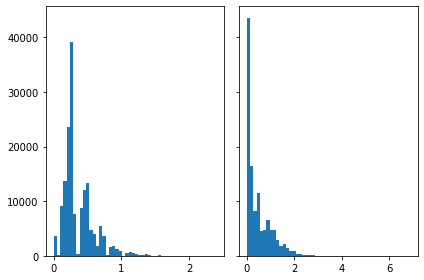

In [5]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
n_bins = 50
axs[0].hist(top_toxicity["toxicity_score"], bins=n_bins)
axs[1].hist(top_aggression["aggression_score"], bins=n_bins)

## Is there a difference in labelling behavior for different demographics?

For this question I want to explore whether there is a difference in labelling behavior for the following different demographics:
- Men
- Women
- Education: Bachelors degree and below
- Education: Masters degree and above
- English as a first language
- English not as a first languagee

I'm interested to see if there are behavioral patterns that could introduce bias from underrepresentation. I will be conducting this analysis on the aggression data since there was greater disagreement in annotation. I will compute the variance in annotations by each worker and look at the aggression score mean and variance for each demographic.

In [23]:
# Load the data for aggression annotations and worker demographic data
aggression = pd.read_csv('./aggression/aggression_annotations.tsv', sep='\t')
demographics = pd.read_csv('./aggression/aggression_worker_demographics.tsv', sep='\t')

# Compute the mean and variance for each worker
var_aggression = aggression.groupby("worker_id").var()
mean_aggression = aggression.groupby("worker_id").mean()

# Join demographics and mean/variance of aggression_score into the same table
merged_var_aggression = pd.merge(var_aggression, demographics, on=['worker_id'], how='inner')
merged_mean_aggression = pd.merge(mean_aggression, demographics, on=['worker_id'], how='inner')

# Write results to CSVs
merged_var_aggression.to_csv('./worker_var_by_demographic.csv')
merged_mean_aggression.to_csv('./worker_mean_by_demographic.csv')

# Create Pivot Table Based on gender, english_first_language, and education
mean_result = merged_mean_aggression.pivot_table('aggression_score', index=['gender', 'english_first_language'], columns=['education'])
var_result = merged_var_aggression.pivot_table('aggression_score', index=['gender', 'english_first_language'], columns=['education'])

# Create Same Pivot Table but count samples for each gender, english_first_language, and education
sample_size = merged_mean_aggression.pivot_table('aggression_score', index=['gender', 'english_first_language'], columns=['education'], aggfunc='count')

print('\nMean scoring for aggression_score')
print(mean_result)
print('\nVariance scoring for aggression_score')
print(var_result)
print('\nSample size for aggression_score')
print(sample_size)



Mean scoring for aggression_score
education                      bachelors  doctorate        hs   masters  \
gender english_first_language                                             
female 0                       -0.212453  -0.049460 -0.237112 -0.219960   
       1                       -0.196315  -0.273747 -0.199552 -0.215532   
male   0                       -0.123375  -0.264268 -0.159520 -0.176032   
       1                       -0.191172   0.268187 -0.083243 -0.212458   
other  0                       -0.566265        NaN       NaN       NaN   

education                          none  professional      some  
gender english_first_language                                    
female 0                            NaN     -0.238900 -0.235030  
       1                            NaN     -0.286986 -0.092844  
male   0                       0.136842     -0.156673 -0.128373  
       1                            NaN     -0.155484 -0.235195  
other  0                            NaN    

## Findings

Unfortunately not every demographic group has a significant enough sample size to make a meaningful comparison, however for those that do, there is a very clear pattern: Women annotated comments as negative more often than men. Here are the statistically significant demographics based on sample size:
- Women with a bachelors degree where English is not their first language
- Women with a masters degree where English is not their first language
- Women with a high school diploma where English is not their first language

It's very possible that this pattern continues for all women, regardless of their education and language background, but we can't definitely say because there are so few annotators where English is their first language, and fewer annotators who have reached higher levels of education. Below are some visuals that highlight the disparity in demographics:

<AxesSubplot:xlabel='gender', ylabel='education'>

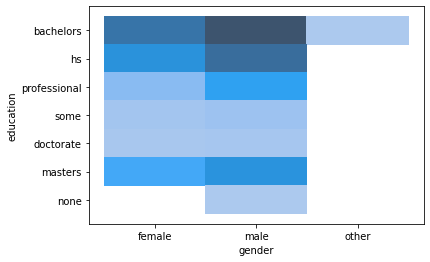

In [42]:
import seaborn as sns

sns.histplot(x=demographics['gender'], y=demographics['education'])

## Further Implications

### What are some other contexts or applications where you would expect the Perspective API to perform particularly well, or particularly poorly? Why?
Some applications have a different demographic than the demographic of these annotators. Given that there's a difference in annotation behavior among demographics and the few number of female and highly educated annotators), there's potential bias in scenarios where comments written are predominantly by women, highly educated, and english as a first language. Also since some language featured higher disagreement among comments discerning gratitude and passive aggression, it's likely the Perspective API performs poorly with these types of language.

### What are some kinds of hostile speech that would be difficult to accurately detect using the approach used to train the Perspective API models? 
The Wikipedia content is written in a somewhat more formal context so microblogs and messaging like Twitter and Whatsapp would not perform well in these spaces. This is because these platforms are more likely to use abbreviated language. Based on the disagreement in the first analysis, sexist, homophobic, and xenophobic language appears to be difficult to accurately detect in the Wikipedia context as well. 

### What are some potential unintended, negative consequences of using the Perspective API for any of these purposes? In your opinion, are these consequences likely or serious enough that you would recommend that the Perspective API not be used in these applications? Why or why not?
The Perspective API was designed for the comments section of Wikipedia, so this API really only makes sense in the context of writing comments on a news article, a blog, or Wiki content. It doesn't make sense in the more formal writing context like Word or Teams because the language used isn't the same kind of language you would typically see in the workplace. The API is not trained on migroblogs or text messages so there could be negative consequences there. Some of the demo applications were Chrome extensions that work on any website, but I think that a blanket approach like this could be detrimental to accurately classifying toxic and aggressive language.


## Appendix

### Top 10 comments with the least agreement
- `NEWLINE_TOKEN:: The various local government areas pages only list them.  I was thinking something like that.  These three paragraphs are from a couple of papers I wrote, they can be incorporated into the article.  NEWLINE_TOKENNEWLINE_TOKENThe states (and territories) run the majority of the government in Australia and devolve some of this power down to local government, local councils.  Because this devolution of power happens on a state by state basis, in different states, the local councils have different powers.  Though generally they provide water, sewerage and look after local roads, with the states looking after health, education, police and so on.NEWLINE_TOKENNEWLINE_TOKENTasmania, like the other states, has a constitution.  Unlike the Australian constitution the Tasmanian one is simply an act of parliament, as such to change it requires no more then a majority in the parliament, not a referendum.  This constitution (among other things) establishes local government in Part ``IVA - Local Government`` (Tasmanian Constitution).  However, this part while establishing the fact that councils will exist, leaves open how they are operated and what their powers are.  Both the system and power of the councils being provided by the ``Parliament ... from time to time`` (Tasmanian Constitution).  It is the ``Local Government Act 1993`` (referred hereafter to as either the 'LGA' or 'the act') that currently provides for the creation of the various councils, the role of the councillors, what power the councils have and so on.  NEWLINE_TOKENNEWLINE_TOKENThe act requires that the various councils ``provide for the health, safety and welfare of the community``, ``represent and promote the interests of the community``, and ``provide for the peace, order and good government of the municipal area``.  Generally the act permits councils to ``do anything necessary or convenient to perform its functions either within or outside its municipal area``.  Specifically, the act provides for the various councils to have the following powers (among others): to charge land rates, ``service rates``, special rates and to levy fines (in relation to by-laws); and, to make by-laws in respect to anything the council has power to do.NEWLINE_TOKEN:: I'm sure the other states have similar legislation.   (Fuck you!) `

- LOL - you thought your sources - including the TBR were more reliable than Boxing News. You know nothing about boxing.NEWLINE_TOKENNEWLINE_TOKENYou're also a fucking liar.NEWLINE_TOKENNEWLINE_TOKENThe jokes that is Ring magazine uses caps, which contradicts your own personal format; http://ringtv.craveonline.com/ratings/super-middleweightNEWLINE_TOKENNEWLINE_TOKENWBC varies and uses yet another format; http://wbcboxing.com/wbceng/championsNEWLINE_TOKENNEWLINE_TOKENWBO using fucking hypens here in yet another format; http://www.wboboxing.com/our-champions/NEWLINE_TOKENNEWLINE_TOKENYour sources are all over the place with formats you stupid bastard. LOL.NEWLINE_TOKENNEWLINE_TOKENBoxing News is far more credible and consistent.NEWLINE_TOKENNEWLINE_TOKENMore correct sources fuckwit;NEWLINE_TOKENNEWLINE_TOKENhttp://www.telegraph.co.uk/sport/othersports/boxing/11626770/James-DeGale-claims-super-middleweight-title-with-points-win-over-Andre-Dirrell-in-Boston.htmlNEWLINE_TOKENNEWLINE_TOKENhttp://www.independent.co.uk/sport/general/boxing/andre-dirrell-vs-james-degale-on-saturday-degale-can-join-britains-great-list-of-supermiddleweight-champions-says-steve-bunce-10259295.htmlNEWLINE_TOKENNEWLINE_TOKENFYI....boxing was created in the ukNEWLINE_TOKENNEWLINE_TOKEN

- ~Your Opinio, Our ViewNEWLINE_TOKENYes. We do know a lot about Masatepe. NEWLINE_TOKENThank you for your comment regarding MasatepeCity. We are native from Masatepe, Nicaragua and we want to tell the world what a beautiful city Masatepe is. Nonetheless, to convey the essence of our culture and the spirit of our traditions, we the people of Masatepe shall have the ability to show the world in our own words, who we are.  NEWLINE_TOKENNEWLINE_TOKENWe look forward to continuo making contribution to WikiPedia regarding the city of Masatepe and we encourage you, no to revert any material posted on WikiPedia by the people of Masatepe. Please govern yourself accordingly. NEWLINE_TOKENNEWLINE_TOKENRespecfully,NEWLINE_TOKENMegaNEWLINE_TOKENNEWLINE_TOKEN

- NEWLINE_TOKENNEWLINE_TOKENNEWLINE_TOKENNEWLINE_TOKENWhy do not the two of you, the mentally retarded Jennygirl and the omnipotent Richie Rich, go together to Harrods and dont forget to choose together, being an authentically healthy and sociable couple,  time and location, maybe a restaurant,and then enjoy very evidentliy your meal and in case you should discover that you cant pay anymore, then do not expect them to let one of you peel the potatoes in return. Maybe they wont even say Hello when you come back after they would be kicking off your dipshit spinning incapable ass from the central perk. Enjoy yourselves and your longest sentence Johnny-come-lately.

- `NEWLINE_TOKENNEWLINE_TOKEN==One giant advertisement==NEWLINE_TOKENHow does a passage like this end up in a Featured Article? (my bolding):NEWLINE_TOKENNEWLINE_TOKEN``The company says that the accuracy of the test exceeds that of conventional methods, such as ultrasonography, amniocentesis, or chorionic villus sampling techniques, and that their test offers ``unsurpassed accuracy, unrivaled earliness, and uncompromised promptness``.[4] Acu-Gen has chosen not to release details of how the test works or proof of its accuracy``NEWLINE_TOKENNEWLINE_TOKENSo basically an unproven claim has been allowed to stand in a featured article - a claim that makes nice advertising for the company.NEWLINE_TOKENThat this has been promoted to Featured Article status SUCKS. Now every company will get their PR people to write a nicely-worded, generally positive article for their products and Bingo! Millions of dollars worth of free advertising.  Shame on you, Wikipedia people.  `

- `NEWLINE_TOKEN::I've had just about enough of your shithead behavior. I said nothing wrong with my comment, and my comment was only factual. If you want to debate what is and isn't worthy of a goddamned encylopedic entry, then I'm sure you're better off arguing with a wall. Shame on you for censoring and removing content of a TALK-PAGE ARTICLE COMMENT. Thankfully you can't edit or destroy the page-history, so people can see just exactly what you removed and how simple you are. For fucks sake, SNS is not a reliable source, and any news outlet that believes so intentionally delves into bad journalistic endeavors. The article is being removed, deal with it dude. Grow up and acknowledge certain facts, and I'm going to end the conversation at that because I've already spent enough time trying to use the simplest of English sentences to outline and debate this idea with full clarity, yet you still can't understand. You want a BLP violation? You've got autism you cold retarded fuck. (By the way, if you don't think a picture of an asian man along with the author's name being ``Gil Asakawa`` would certainly clarify that the author is indeed Asian, you're simply completely wrong in likely every regard of life itself that requires any sense of observation skills    `

- `NEWLINE_TOKENNEWLINE_TOKEN== Officious Busybody / Editing Nazi (a.k.a. Ddstretch) ==NEWLINE_TOKENNEWLINE_TOKENOn January 7th 2009 Ddstretch disabled editing from an IP address that they considered had insulted them by calling them an ``editing facist``. This IP address was not a user's static address nor indeed a dynamic address attributable therefore to no-one but was infact the IP address that shows for all TalkTalk customers in the UK. By disabling this address they disabled every single TalkTalk customer in the UK, a number which runs into millions. They claim not to be an editing facist but then behaved by disabling millions simply because they were insulted despite the large notice above. Their actions speak for themselves. Any further comment would be superflous!`

- NEWLINE_TOKENNEWLINE_TOKEN== User:Lagoo Sab is a sockpuppet of User:Ketabtoon ==NEWLINE_TOKENNEWLINE_TOKENGood morning dear Admin, NEWLINE_TOKENNEWLINE_TOKENUser:Lagoo Sab is a sockpuppet of User:Ketabtoon. I contacted him through a just created account and his email and introduced myself as one of his allies and talked with him about the Pashtun-Tajik-Hazara editwars here on Wikipedia and told him I would support him against infidel Hazaras and sellout Tajiks. In return he told me creating at least two accounts and use them alternating. Further, he said between both account┬┤s usage should be at least 3month break for not beeing identified as sockpuppet. He himself told me Ketabtoon is another account of him which is used on his cousins computer. Now it┬┤s your duty as admin and guard of Wikipedia┬┤s policy to do something against him.NEWLINE_TOKENNEWLINE_TOKENwithg best regardsNEWLINE_TOKEN  

- NEWLINE_TOKENNEWLINE_TOKEN== Thanks for being late to the party ==NEWLINE_TOKENNEWLINE_TOKENbut I have added no new articles since yesterday.  While you have all been very impolite and overly protective, I have lost interest in torturing you, so you can go fuck yourself.

- `The ``editors`` of the article, which concerns a conservative spokesman who turned out to be a porn actor and a prostitute, have altered the article to refer to the reports of his prostitution  which have be definitively PROVEN  as ``rumors,`` even though the article's subject acknowledged his prostitution in a nationally broadcast radio program and in an article under his own name in Salon.com. At the same time, they insured that material from an unverified ``interview`` by an evangelical ``ex-gay`` blog was included.NEWLINE_TOKENNEWLINE_TOKENWhen I and others pointed out that none of this is true, one of the editors, a hack who goes by the name ``Elonka,`` replied that Wikipedia is not in the business of telling the truth. That's for damn sure!NEWLINE_TOKENNEWLINE_TOKEN`
